In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab_Notebooks/Python')

In [0]:
!pip install comet_ml

     |████████████████████████████████| 174kB 8.7MB/s 
     |████████████████████████████████| 409kB 10.9MB/s 
     |████████████████████████████████| 204kB 19.2MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34546 sha256=dc8ca6812a9ee7fd0f04a47b3139cd12a782da48f03390e04300e8d549fcb74b
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


In [0]:
%tensorflow_version 1.x
from comet_ml import Experiment
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.optimizers import Adam

In [0]:
experiment = Experiment(api_key="GytDCgaK0BqzgRHv04J268iS1",
                        project_name="mnist", workspace="pooya-mohammadi-k")

learning_rate = 0.1
epochs = 20
batch_size = 32
act_fn = 'relu'
h_layer_1 = 20
h_layer_2 = 20

params={'batch_size': batch_size,
        'epochs':epochs,
        'layer_activation':act_fn,
        'optimizer':'adam',
        'learning_rate': learning_rate,
        "h_layer_1" :h_layer_1,
        "h_layer_2" :h_layer_2,
}

# log parameters in Comet.ml
experiment.log_parameters(params)

COMET INFO: ----------------------------
COMET INFO: Comet.ml Experiment Summary:
COMET INFO:   Data:
COMET INFO:     url: https://www.comet.ml/pooya-mohammadi-k/mnist/a3c16ba2d5604e6c80038381e39af2d5
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     sys.cpu.percent.01 [5]             : (0.9, 44.2)
COMET INFO:     sys.cpu.percent.02 [5]             : (1.0, 45.0)
COMET INFO:     sys.cpu.percent.avg [5]            : (0.95, 44.6)
COMET INFO:     sys.gpu.0.free_memory [6]          : (16663838720.0, 17071734784.0)
COMET INFO:     sys.gpu.0.gpu_utilization [6]      : (0.0, 0.0)
COMET INFO:     sys.gpu.0.total_memory             : (17071734784.0, 17071734784.0)
COMET INFO:     sys.gpu.0.used_memory [6]          : (0.0, 407896064.0)
COMET INFO:     sys.ram.total [5]                  : (13655232512.0, 13655232512.0)
COMET INFO:     sys.ram.used [5]                   : (717266944.0, 1906647040.0)
COMET INFO:     test_accuracy                      : (0.9482, 0.9482)
COMET INFO:     test_l

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784)/255
x_test = x_test.reshape(-1, 784)/255

y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

print('x_test: ', x_test.shape)
print('x_train: ', x_train.shape)

print('y_test: ', y_test.shape)
print('y_train: ', y_train.shape)

x_test:  (10000, 784)
x_train:  (60000, 784)
y_test:  (10000, 10)
y_train:  (60000, 10)


In [0]:
model = Sequential()
model.add(Dense(units=h_layer_1, activation=act_fn, input_shape=(784,), name='me_dense_1'))
model.add(Dense(units=h_layer_2, activation=act_fn))
model.add(Dense(units=10, activation='softmax'))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
me_dense_1 (Dense)           (None, 20)                15700     
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


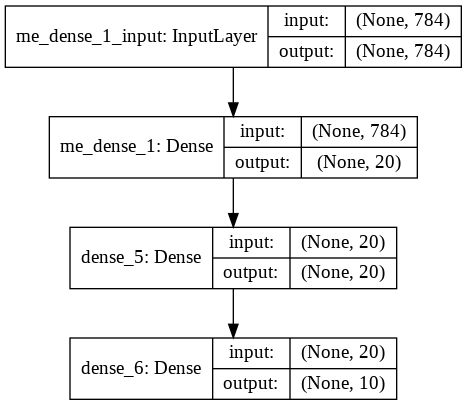

In [0]:
model.compile(optimizer=Adam(learning_rate), loss='categorical_crossentropy', metrics=['acc'])
model.summary()
plot_model(model, to_file='mnist_model.png', show_shapes=True)

In [0]:
with experiment.train():
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        )

#will log metrics with the prefix 'test_'
with experiment.test():
    loss, accuracy = model.evaluate(x_test, y_test)
    metrics = {
        'loss':loss,
        'accuracy':accuracy
    }
    experiment.log_metrics(metrics)

Epoch 1/20
60000/60000 [==============================] - 6s 103us/step - loss: 1.6548 - acc: 0.3979
Epoch 2/20
60000/60000 [==============================] - 6s 102us/step - loss: 2.3157 - acc: 0.2207
Epoch 3/20
60000/60000 [==============================] - 6s 101us/step - loss: 2.1610 - acc: 0.1686
Epoch 4/20
60000/60000 [==============================] - 6s 103us/step - loss: 2.0613 - acc: 0.1985
Epoch 5/20
60000/60000 [==============================] - 6s 102us/step - loss: 2.0797 - acc: 0.1919
Epoch 6/20
60000/60000 [==============================] - 6s 106us/step - loss: 2.0542 - acc: 0.2007
Epoch 7/20
60000/60000 [==============================] - 6s 104us/step - loss: 2.1567 - acc: 0.1703
Epoch 8/20
60000/60000 [==============================] - 6s 103us/step - loss: 2.0401 - acc: 0.2021
Epoch 9/20
60000/60000 [==============================] - 6s 100us/step - loss: 2.1340 - acc: 0.1665
Epoch 10/20
60000/60000 [==============================] - 6s 102us/step - loss: 2.0579 - a

*:)*